### Machine Learning: Anomaly Detection
___

#### Summary:

Anomaly detection is a useful algorithm when you don't have much data on anomalies. What it does is it takes the examples and constructs a distribution from it. Any new example that falls far from the center of the distribution is considered an anomaly. How far? That can be determined by using a labelled validation set. It is okay to have an unlabelled training set since anomalies won't affect the distribution much. 
___
#### This notebook will include:
1. Anomaly Detection
___
#### Reference: 

Much of what is in this notebook was learned from the Machine Learning Coursera course by Andrew Ng.

X_train: (13, 2)
X_val: (4, 2)
X_test: (4, 2)
y_val: (4,)


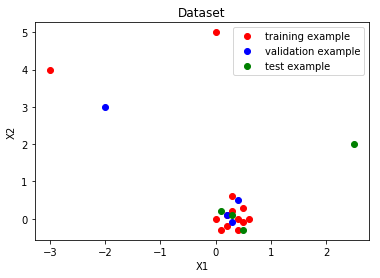

In [2]:
# Example Dataset
"""
The dataset used contains 13 training examples, 4 validation examples and 4 test examples. Each example
contains 2 features and only the validation examples are labelled.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating the dataset
X_train = np.array([[0,0],[0.1,-0.3],[0.2,0.1],[0.2,-0.2],[0.3,0.2],[0.3,0.6],[0.4,0],
                    [0.4,-0.3],[0.5,-0.1],[0.5,0.3],[0.6,0],[-3,4],[0,5]])
X_val = np.array([[0.2,0.1],[0.3,-0.1],[0.4,0.5],[-2,3]])
y_val = np.array([0,0,0,1])
X_test = np.array([[0.1,0.2],[0.3,0.1],[0.5,-0.3],[2.5,2]])

# Printing the dataset shape
print('X_train:', X_train.shape)
print('X_val:', X_val.shape)
print('X_test:', X_test.shape)
print('y_val:', y_val.shape)

# Plotting the dataset
plt.plot(X_train[:,0], X_train[:,1], 'ro', label = 'training example')
plt.plot(X_val[:,0], X_val[:,1], 'bo', label = 'validation example')
plt.plot(X_test[:,0], X_test[:,1], 'go', label = 'test example')
plt.title('Dataset')
plt.ylabel('X2')
plt.xlabel('X1')
plt.legend()

In [20]:
# Anomaly Detection
"""
In this section we implement an algorithm that is able to detect anomalies.
"""
# Importing the libraries
import numpy as np
    
# Reshaping y to be a column vector for convenience
y_val = y_val.reshape(-1,1)
    
# Calculating the mean and covariance of the training set
mu = np.mean(X_train, axis=0)
covariance = np.cov(np.transpose(X_train))
    
# Defining a function that returns the probability of X given a Gaussian distribution on the training set
def Multivariate_Gaussian(X, mu, covariance):
    prob = np.zeros((X.shape[0], 1))
    for i in range (X.shape[0]):
        prob[i] = (2*np.pi)**(-X.shape[1]/2) * np.linalg.det(covariance)**(-0.5)*np.exp\
        (-0.5*np.matmul(np.matmul((X[i, :]-mu),np.linalg.pinv(covariance)), np.transpose(X[i, :]-mu)))
    return prob
    
# Calculating the probability of the validation set
prob_val = Multivariate_Gaussian(X_val, mu, covariance)
    
# Finding the optimal threshold epsilon using the validation set (predict anomaly if prob < epsilon)
epsilon_optimal = 0
F1_optimal = 0

stepsize = (np.max(prob_val) - np.min(prob_val)) / 1000
for epsilon in np.arange(np.min(prob_val), np.max(prob_val), stepsize): 
    predictions = prob_val < epsilon
        
    # Calculating the F1 score
    fp = np.sum((predictions == 1) * (y_val == 0))
    tp = np.sum((predictions == 1) * (y_val == 1))
    fn = np.sum((predictions == 0) * (y_val == 1))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = (2 * precision * recall) / (precision + recall)
        
    # Storing the optimal threshold epsilon
    if F1 > F1_optimal:
        F1_optimal = F1
        epsilon_optimal = epsilon
            
print('Optimal epsilon:', epsilon_optimal)
print('F1 score on the validation set:', F1_optimal)


Optimal epsilon: 0.01194475761
F1 score on the validation set: 1.0


C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: invalid value encountered in long_scalars


In [25]:
# Predicting anomalies
"""
Now that we have the optimal epsilon value, which is the threshold used when determining if an example
is an anomaly or not, we can predict if any new example is an anomaly or not.
"""
# Calculating the probability of the training set
prob_train = Multivariate_Gaussian(X_train, mu, covariance)

# Printing the number of anomalies in the training set
print('Number of anomalies in the training set:', np.sum(prob_train < epsilon_optimal))

# Calculating the probability of the test set
prob_test = Multivariate_Gaussian(X_test, mu, covariance)

# Printing the number of anomalies in the training set
print('Number of anomalies in the test set:', np.sum(prob_test < epsilon_optimal))

# Finding which examples in the test set are anomalies
print('Anomalies in the test set:', (prob_test < epsilon_optimal).astype(int).ravel())

X_sample = np.array([[-1, 2]])
# Calculating the probability of a new example
prob_sample = Multivariate_Gaussian(X_sample, mu, covariance)

# Predicting if the example is an anomaly
if (prob_sample < epsilon_optimal) == True:
    print(X_sample,'is an anomaly.')
else:
    print(X_sample,'is not an anomaly.')


Number of anomalies in the training set: 2
Number of anomalies in the test set: 1
Anomalies in the test set: [0 0 0 1]
[[-1  2]] is not an anomaly.


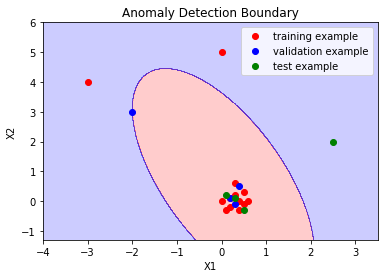

In [35]:
# Visualizing the anomaly detection boundary
"""
A good way to understand how the anomaly detection algorithm works is to visualize the boundary that
separates anomalies from non-anomalies.
"""
# Combining the training, validation and test set into one dataset
X = np.concatenate([X_train, X_val, X_test])

# Plotting the anomaly detection boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train[:,0], X_train[:,1], 'ro', label = 'training example')
plt.plot(X_val[:,0], X_val[:,1], 'bo', label = 'validation example')
plt.plot(X_test[:,0], X_test[:,1], 'go', label = 'test example')
X_grid_1 = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X[:,1])-1, max(X[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
y_grid = Multivariate_Gaussian(np.c_[X_grid_1.ravel(), X_grid_2.ravel()], 
                               mu, covariance) < epsilon_optimal

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), 
             alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('Anomaly Detection Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()